# Breath of the Wild

In [38]:
# call in dependencies
import requests
import json
import pandas as pd
import os
from pyrule_compendium import compendium
from pprint import pprint
import csv
import matplotlib.pyplot as plt

In [39]:
comp = compendium()

#pprint(comp.get_all()["equipment"][0]) # get all entries
# print(comp.get_entry("silver lynel")) # get a specific entry with it's name
# pprint(comp.get_entry(380)) #get a specific entry with it's ID
# pprint(comp.get_category("equipment")) # get all entries in a category
# comp.download_entry_image("silver lynel", "dream_pet.png") # download entry image

In [40]:
# create empty list to store item
equip_list = []
equip = {}
materials = []
monsters = []
foods = []
drops = []

In [41]:
# pull category data and assign to a variable, to be used for appending to lists.
equipment_json = comp.get_all()["equipment"]
materials_json = comp.get_all()["materials"]
monsters_json = comp.get_all()["monsters"]
creatures_json = comp.get_all()["creatures"]["food"]

# Get equipment list

In [42]:
# create loop to get equipment data store to list.
for i in equipment_json:
    # create a dictionary for equipment to create DataFrame
    equipment_dict = {
        "name": i['name'],
        "attack": i['attack'],
        "defense": i['defense']
    }
    # add dictionary to list.
    equip_list.append(equipment_dict)

In [43]:
# Create DataFrame and save to .csv file
equipment_df = pd.DataFrame(equip_list).sort_values(by="name")
equipment_df.to_csv("BotW_equip_stats.csv", index=False)

# Get materials list

In [44]:
# get materials and add to list
for i in materials_json:
    # create a dictionary for materials to create DataFrame)
    material_dict = {
        "name": i['name'],
        "hearts_recovered": i['hearts_recovered'],
        "cooking_effect": i['cooking_effect'],
    }
     # add dictionary to list.
    materials.append(material_dict)

In [45]:
# Create DataFrame from dictionary
materials_df = pd.DataFrame(materials)

In [46]:
# add a 'none' to the cooking_effect that show a blank
materials_df["cooking_effect"] = ['none' if x == '' else x for x in materials_df['cooking_effect']]

In [47]:
# Preivew DataFrame
#materials_df

In [48]:
# save to .csv file
materials_df.to_csv("BotW_material_stats.csv", index=False)

# Get foods list

In [49]:
# get foods and add to list
for i in creatures_json:
    # create a dictionary for foods to create DataFrame)
    food_dict = {
        "name": i['name'],
        "hearts_recovered": i['hearts_recovered'],
        "cooking_effect": i['cooking_effect'],
    }
    # add dictionary to list.
    foods.append(food_dict)

In [50]:
# Create DataFrame
# add a 'none' to the foods that show a blank
foods_df = pd.DataFrame(foods).sort_values(by="name")
foods_df["cooking_effect"] = ['none' if x == '' else x for x in foods_df['cooking_effect']]

In [51]:
# save to .csv file
foods_df.to_csv("BotW_food_stats.csv", index=False)

# Get monster list ID

In [52]:
# get foods and add to list
for i in monsters_json:
    # create a dictionary for monsters to create DataFrame)
    monster_dict = {
        "name": i['name'],
        "id": i['id'],
    }
    # add dictionary to list.
    monsters.append(monster_dict)

In [53]:
# Create DataFrame and save to .csv file
monsters_df = monsters_df = pd.DataFrame(monsters).sort_values(by="name")
monsters_df.to_csv("BotW_monster_list.csv", index=False)
monsters_df = monsters_df.set_index("id")
monsters_df

,name
id,
105,black bokoblin
149,black hinox
115,black lizalfos
110,black moblin
101,blizzrobe
...,...
161,waterblight ganon
123,white-maned lynel
162,windblight ganon


# Union foods and materials

In [54]:
# union materials df and foods df into a new DataFrame
consumables_df = pd.concat([materials_df, foods_df]).reset_index(drop=True)

In [55]:
consumables_df = consumables_df.sort_values(by="hearts_recovered", ascending=False)

In [56]:
# Save consumables to a csv file
consumables_df.to_csv("BotW_consumables.csv", index=False)

# Get drops ID


In [57]:
# Iterate through json and check if the value that I represents is an empty list
# If it is set the drops variable to None otherwise append the drop information and create a DF
drops = []
for i in monsters_json:
    if i['drops'] == []:
        i['drops'] = None
    else:
        drops_dict = {
        "drops": i['drops'],
        "id": i['id'],
        }
    drops.append(drops_dict)
drops_df = pd.DataFrame(drops)
# set the index of the dataframe to the id (will be handy when you split your entries next)
drops_df.set_index(drops_df['id'],inplace=True)
# split each item in  the df['drops'] and send it to a new row. Setting the index above allows us to 
# keep the index intact when we split them. 
drops_df = drops_df.explode('drops')
# Filter the dataframe to keep only the column that we need
drops_df[['drops']]

,drops
id,
94,octorok tentacle
94,octo balloon
94,octorok eyeball
108,moblin horn
108,moblin fang
...,...
89,fire keese wing
89,keese eyeball
123,lynel horn


In [58]:
drops_df.to_csv("BotW_drop.csv")

In [59]:
# create dataframe to hold drop counts
drops_count_df = pd.DataFrame(drops_df.index.value_counts())
# Renme id column to 'drop_counts'
drops_count_df = drops_count_df.rename(columns={"id":"drop_count"})

In [60]:
# rename index to 'id'
drops_count_df.index.name = "id"
drops_count_df

,drop_count
id,
112,18
124,16
122,12
139,12
148,12
...,...
154,1
87,1
86,1


In [61]:
# Merge drop_counts_df and mosnters_df to obtain total count of drops
# for a monster
calamity_df = pd.merge(monsters_df, drops_count_df, how="outer", on="id")
calamity_df = calamity_df.sort_values(by="drop_count", ascending=False)

In [62]:
# Save new DataFrame to csv file
calamity_df
calamity_df.to_csv("BotW_drop_counts.csv")

## Let's get into the game details

## how many defense weapons are there and which is the best one?

In [63]:
# Bring equipment table
equipment_df = equipment_df.fillna(0).sort_values(by="defense", ascending=False)
equipment_df

,name,attack,defense
66,hylian shield,0.0,90.0
31,ancient shield,0.0,70.0
27,royal guard's shield,0.0,70.0
83,savage lynel shield,0.0,62.0
96,royal shield,0.0,55.0
...,...,...,...
144,great flameblade,34.0,0.0
109,great frostblade,30.0,0.0
59,great thunderblade,32.0,0.0
80,guardian spear,10.0,0.0


In [64]:
# create Defense Df for barchart
# set variables to hols name and defense
equipment = equipment_df["name"]
#convert floats to ints
defense = equipment_df["defense"].astype(int)
defense_bar_df = pd.DataFrame({"Equipment":equipment, "Defense":defense})
defense_bar_df = defense_bar_df[defense_bar_df['Defense'] !=0]
defense_bar_df = defense_bar_df.set_index("Equipment")

the shiled with the best defense is the Hylian Shield with 90 defense


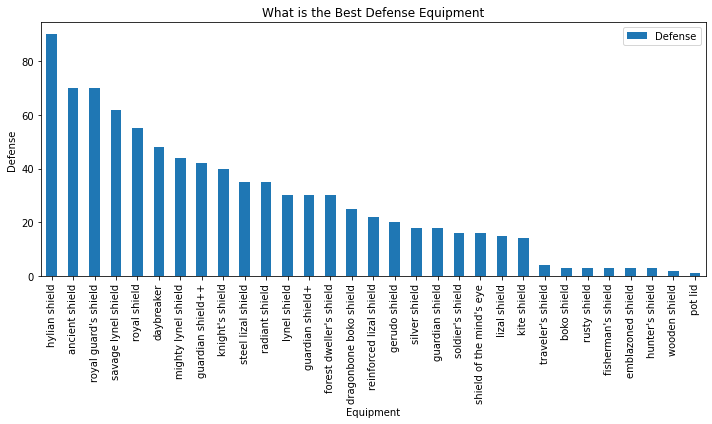

In [65]:
# plot bar chart from DataFrame
fig, ax = plt.subplots()
defense_bar_df.plot(kind="bar", figsize=(10,6), ax=ax, 
                  title="What is the Best Defense Equipment",
                  xlabel="Equipment",
                  ylabel="Defense");
fig.tight_layout();
plt.savefig("../BotW/images/defense_bar.png")
print(f"the shiled with the best defense is the Hylian Shield with {int(equipment_df['defense'].max())} defense")

## Cooking gives you Hearts
## Hearts help you stay alive

In [66]:
# obtain consumables DF
consumables_df
# create hearts Df for barchart
hearts_df = pd.DataFrame(consumables_df)
# drop the items that do not give you hearts
hearts_df = hearts_df[hearts_df['hearts_recovered'] !=0]
# set variables to hold name and


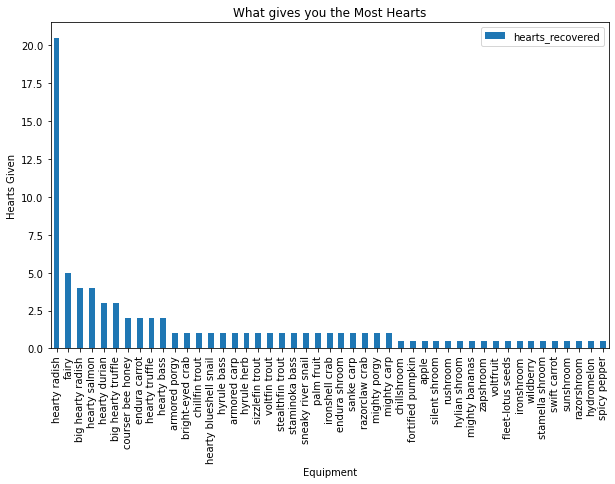

In [67]:
fig2, ax2 = plt.subplots()
hearts_df.plot(kind="bar", x="name", y ="hearts_recovered",figsize=(10,6), ax=ax2, 
                  title="What gives you the Most Hearts",
                  xlabel="Equipment",
                  ylabel="Hearts Given");

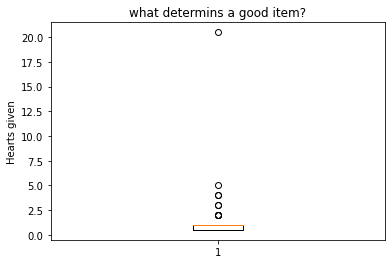

The lower quartile of hearts given is: 0.5
The upper quartile of hearts given is: 1.0
The interquartile range of hearts given is: 0.5
The the median of hearts given is: 1.0 
Values below -0.25 could be bad items.
Values above 1.75 could be really good item.


In [68]:
# Create box plot to determine outlier from really good items
fig3, ax3 = plt.subplots()
ax3.set_title('what determins a good item?')
ax3.set_ylabel('Hearts given')
ax3.boxplot(hearts_df['hearts_recovered'])
plt.show()

# What makes an item good? 

quartiles = hearts_df['hearts_recovered'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of hearts given is: {lowerq}")
print(f"The upper quartile of hearts given is: {upperq}")
print(f"The interquartile range of hearts given is: {iqr}")
print(f"The the median of hearts given is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be bad items.")
print(f"Values above {upper_bound} could be really good item.")

In [69]:
# Create loop to display the good items
# for hearts in hearts_df['hearts_recovered']:
#     if hearts_df['hearts_recovered'].all() > 1.75:

## Let's get cooking!

In [70]:
# Create DataFrame for cooking effects
cooking_df = pd.DataFrame(consumables_df)
# remove those that don't give a cooking effect
#cooking_df = cooking_df[cooking_df['cooking_effect'] !='none']
cooking_df

,name,hearts_recovered,cooking_effect
17,hearty radish,20.5,extra hearts
44,fairy,5.0,none
10,big hearty radish,4.0,extra hearts
49,hearty salmon,4.0,extra hearts
27,hearty durian,3.0,extra hearts
...,...,...,...
50,hightail lizard,0.0,speed up
19,blue nightshade,0.0,stealth up
48,hearty lizard,0.0,extra hearts
43,energetic rhino beetle,0.0,stamina recovery


there are a total of 9 different types of consumales that give you extra hearts
this is good for survival and very beneficial for cooking!


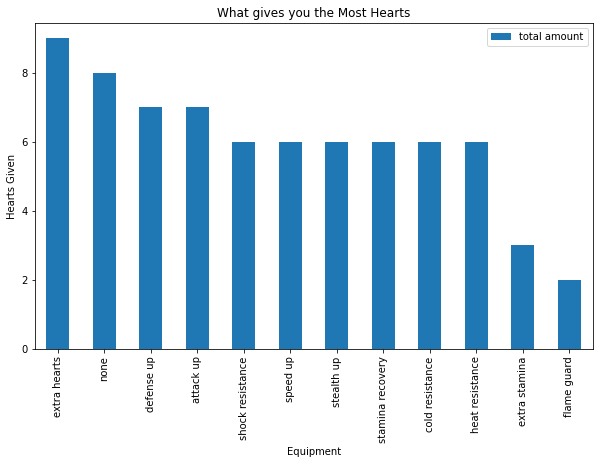

In [71]:
# Create a bar chart to capture the value counts of each cooking effect
fig4, ax4 = plt.subplots()
x = cooking_df['cooking_effect'].unique()
y = cooking_df['cooking_effect'].value_counts()
# create a new df to hold the value counts of each cooking effect
effect_count_df = pd.DataFrame({"cooking_effect":x, "total amount":y})
effect_count_df.plot(kind="bar",figsize=(10,6), ax=ax4, 
                  title="What gives you the Most Hearts",
                  xlabel="Equipment",
                  ylabel="Hearts Given");
print(f"there are a total of {cooking_df['cooking_effect'].value_counts().max()} different types of consumales that give you extra hearts")
print("this is good for survival and very beneficial for cooking!")

## Final Observation

In [79]:
final_df = pd.DataFrame(calamity_df)
final_df

,name,drop_count
id,,
112,silver moblin,18.0
124,silver lynel,16.0
122,blue-maned lynel,12.0
117,fire-breath lizalfos,12.0
139,stone talus (luminous),12.0
...,...,...
137,monk maz koshia,NaN
102,thunder wizzrobe,NaN
159,thunderblight ganon,NaN


In [84]:
# drop the items that do not give you hearts
final_df = final_df.dropna()
final_df

,name,drop_count
id,,
112,silver moblin,18.0
124,silver lynel,16.0
122,blue-maned lynel,12.0
117,fire-breath lizalfos,12.0
139,stone talus (luminous),12.0
...,...,...
153,dinraal,1.0
84,chuchu,1.0
154,naydra,1.0
